In [7]:
 !pip3 install quandl
import quandl

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
df=quandl.get('WIKI/AAPL')

In [10]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,2093900.0,0.0,1.0,0.422706,0.424470,0.422706,0.422706,117258400.0
1980-12-15,27.38,27.38,27.25,27.25,785200.0,0.0,1.0,0.402563,0.402563,0.400652,0.400652,43971200.0
1980-12-16,25.37,25.37,25.25,25.25,472000.0,0.0,1.0,0.373010,0.373010,0.371246,0.371246,26432000.0
1980-12-17,25.87,26.00,25.87,25.87,385900.0,0.0,1.0,0.380362,0.382273,0.380362,0.380362,21610400.0
1980-12-18,26.63,26.75,26.63,26.63,327900.0,0.0,1.0,0.391536,0.393300,0.391536,0.391536,18362400.0


In [11]:
df.shape

(9400, 12)

In [12]:
df['Split Ratio'].value_counts()

1.0    9396
2.0       3
7.0       1
Name: Split Ratio, dtype: int64

In [13]:
df['HL_PCT']=(df['Adj. High']-df['Adj. Low'])/df['Adj. Close']*100.0

In [14]:
df['PCT_Change']=(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0

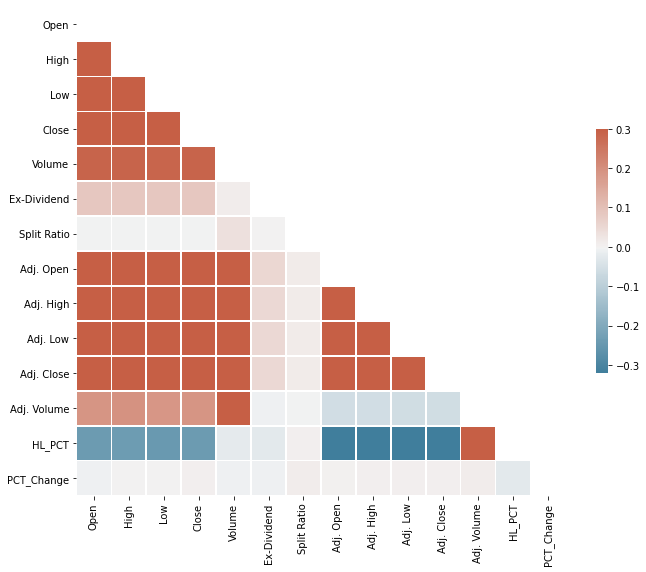

In [15]:
import seaborn as sns
corr=df.corr()

mask=np.triu(np.ones_like(corr,dtype=bool))

f,ax=plt.subplots(figsize=(11,9))

cmap=sns.diverging_palette(230,20,as_cmap=True)

sns.heatmap(corr,mask=mask,cmap=cmap,vmax=0.3,center=0,
            square=True,linewidth=0.5,cbar_kws={'shrink':0.5})

In [16]:
df=df[['Adj. Close','PCT_Change','HL_PCT','Adj. Volume']]

In [17]:
df

,Adj. Close,PCT_Change,HL_PCT,Adj. Volume
Date,,,,
1980-12-12,0.422706,0.000000,0.417391,117258400.0
1980-12-15,0.400652,-0.474799,0.477064,43971200.0
1980-12-16,0.371246,-0.473000,0.475248,26432000.0
1980-12-17,0.380362,0.000000,0.502513,21610400.0
1980-12-18,0.391536,0.000000,0.450620,18362400.0
...,...,...,...,...
2018-03-21,171.270000,-2.153793,2.236235,35247358.0
2018-03-22,168.845000,-0.679412,2.416417,41051076.0
2018-03-23,164.940000,-2.048815,3.019280,40248954.0


In [18]:
df.shape

(9400, 4)

In [19]:
df.isna().sum()

Adj. Close     0
PCT_Change     0
HL_PCT         0
Adj. Volume    0
dtype: int64

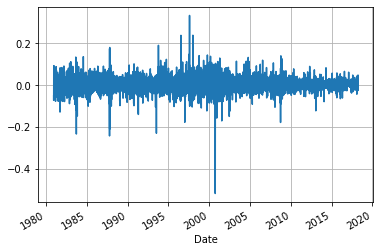

In [20]:
df['Adj. Close'].pct_change().plot(grid=True)

correlation

In [21]:
df.corr()

,Adj. Close,PCT_Change,HL_PCT,Adj. Volume
Adj. Close,1.000000,0.006434,-0.319927,-0.057168
PCT_Change,0.006434,1.000000,-0.023590,0.013150
HL_PCT,-0.319927,-0.023590,1.000000,0.367980
Adj. Volume,-0.057168,0.013150,0.367980,1.000000


In [22]:
label=df['Adj. Close'].shift(-2)

In [23]:
label.isna().sum()

2

dropping the null values

In [24]:
label.dropna(inplace=True)

In [25]:
y=label.values

In [28]:
df=df[:9398]

Reshaping the column

In [29]:
y=y.reshape(-1,1)

In [30]:
y.shape

(9398, 1)

In [31]:
X=df.drop('Adj. Close',axis=1)

Standardizing

In [32]:
MinMax=MinMaxScaler().fit(X)
minmax=MinMaxScaler().fit(y)

In [34]:
X=MinMax.transform(X)
y=minmax.transform(y)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [39]:
model=LinearRegression()
model.fit(X_train,y_train)

In [43]:
score=model.score(X_test,y_test)

In [46]:
model.coef_

array([[ 0.02832573, -1.21495866,  0.34790103]])

In [47]:
y_pred=model.predict(X_test)

In [48]:
mse=mean_squared_error(y_test,y_pred)
mse

0.04316823004759079